##Limpieza Datos Ventas por Mes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ruta = "/content/drive/My Drive/Venta.csv"
df = pd.read_csv(ruta)

In [ ]:
df.head()

,TIENDA_ID,MES_ID,VENTA_TOTAL
0,813,202404,1042761.16
1,742,202404,604946.96
2,436,202404,2486787.81
3,732,202404,680701.78
4,282,202404,1227768.82


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21381 entries, 0 to 21380
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIENDA_ID    21381 non-null  int64  
 1   MES_ID       21381 non-null  int64  
 2   VENTA_TOTAL  21381 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 501.2 KB


In [ ]:
df.shape

(21381, 3)

In [ ]:
df["TIENDA_ID"].nunique()

1053

In [ ]:
df.isnull().sum()

,0
TIENDA_ID,0
MES_ID,0
VENTA_TOTAL,0


In [ ]:
df.describe()

,TIENDA_ID,MES_ID,VENTA_TOTAL
count,21381.000000,21381.000000,2.138100e+04
mean,517.067443,202350.053693,1.058229e+06
std,304.120250,49.328270,4.433803e+05
min,1.000000,202301.000000,0.000000e+00
25%,255.000000,202306.000000,7.514508e+05
50%,510.000000,202311.000000,1.014591e+06
75%,765.000000,202404.000000,1.311946e+06
max,1056.000000,202412.000000,3.848653e+06


<Axes: >

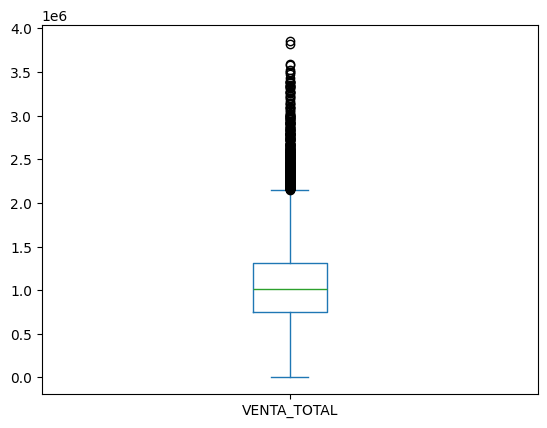

In [ ]:
df["VENTA_TOTAL"].plot(kind="box")

<Axes: ylabel='Frequency'>

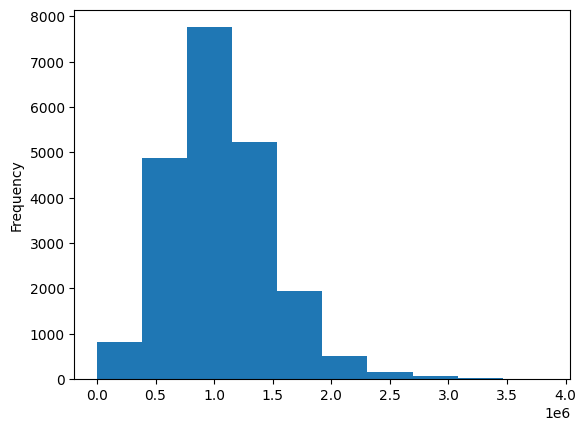

In [ ]:
df["VENTA_TOTAL"].plot(kind="hist")

In [ ]:
df.groupby("TIENDA_ID").describe()

MES_ID                                                               \
           count      mean        std       min       25%       50%       75%   
TIENDA_ID                                                                       
1           21.0  202349.0  50.415275  202301.0  202306.0  202311.0  202404.0   
2           21.0  202349.0  50.415275  202301.0  202306.0  202311.0  202404.0   
3           21.0  202349.0  50.415275  202301.0  202306.0  202311.0  202404.0   
4           21.0  202349.0  50.415275  202301.0  202306.0  202311.0  202404.0   
5           21.0  202349.0  50.415275  202301.0  202306.0  202311.0  202404.0   
...          ...       ...        ...       ...       ...       ...       ...   
1052        21.0  202349.0  50.415275  202301.0  202306.0  202311.0  202404.0   
1053        21.0  202349.0  50.415275  202301.0  202306.0  202311.0  202404.0   
1054        21.0  202349.0  50.415275  202301.0  202306.0  202311.0  202404.0   
1055        21.0  202349.0  50.415275  202301.0  202306.0  202311.0  202404.0   
1056        21.0  202349.0  50.415275  202301.0  202306.0  202311.0  202404.0   

                    VENTA_TOTAL                                          \
                max       count          mean            std        min   
TIENDA_ID                                                                 
1          202412.0        21.0  7.080276e+05  188238.639493  155325.03   
2          202412.0        21.0  8.994741e+05  147170.438997  482736.19   
3          202412.0        21.0  8.274871e+05  170336.714410  457933.59   
4          202412.0        21.0  1.247370e+06  215367.969433  566760.26   
5          202412.0        21.0  1.596267e+06  256352.799184  769058.20   
...             ...         ...           ...            ...        ...   
1052       202412.0        21.0  1.136733e+06  205047.529421  518993.77   
1053       202412.0        21.0  7.660571e+05  235523.876873   57107.57   
1054       202412.0        21.0  1.561485e+06  280404.660979  568775.18   
1055       202412.0        21.0  1.014392e+06  167387.143042  465697.15   
1056       202412.0        21.0  1.284810e+06  230943.738015  536720.10   

                                                           
                  25%         50%         75%         max  
TIENDA_ID                                                  
1           697411.28   739971.54   837783.48   919614.50  
2           810243.42   923898.95   978336.28  1140719.77  
3           704496.74   840699.23   911860.17  1107760.00  
4          1136516.53  1284896.74  1372968.07  1592000.84  
5          1508769.78  1628417.71  1727566.05  2004008.03  
...               ...         ...         ...         ...  
1052       1093866.97  1167677.27  1259744.95  1468389.29  
1053        766204.45   843454.36   896450.48  1006088.57  
1054       1482597.24  1567924.82  1702360.77  1921428.67  
1055        964615.91  1019052.12  1118569.60  1236925.17  
1056       1178939.98  1311964.82  1454479.34  1631045.10  

[1053 rows x 16 columns]

<Axes: ylabel='Frequency'>

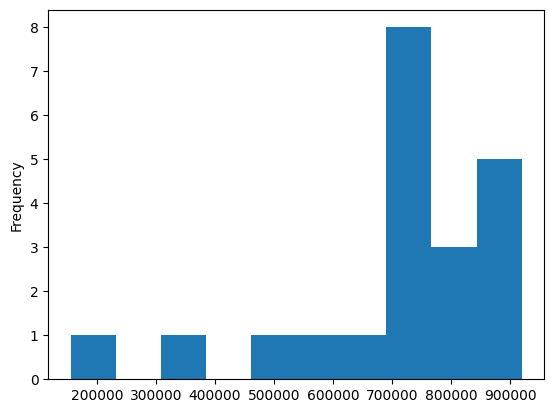

In [ ]:
df[df["TIENDA_ID"] == 1]["VENTA_TOTAL"].plot(kind="hist")

<Axes: ylabel='Frequency'>

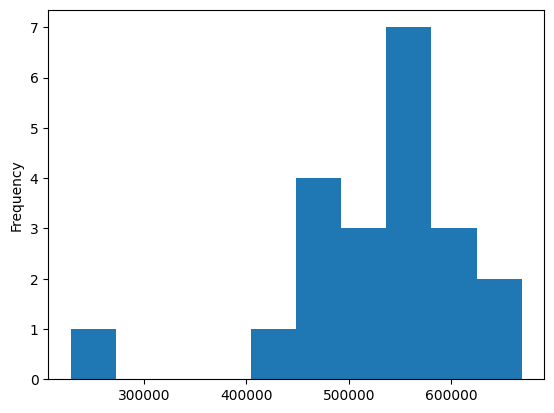

In [ ]:
df[df["TIENDA_ID"] == 10]["VENTA_TOTAL"].plot(kind="hist")

<Axes: ylabel='Frequency'>

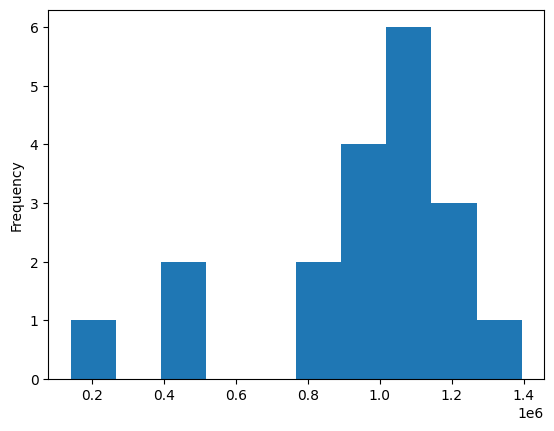

In [ ]:
df[df["TIENDA_ID"] == 20]["VENTA_TOTAL"].plot(kind="hist")

In [ ]:
def filtrar_outliers_iqr(grupo):
    Q1 = grupo["VENTA_TOTAL"].quantile(0.25)
    Q3 = grupo["VENTA_TOTAL"].quantile(0.75)
    IQR = Q3 - Q1
    filtro = (grupo["VENTA_TOTAL"] >= Q1 - 1.5 * IQR) & (grupo["VENTA_TOTAL"] <= Q3 + 1.5 * IQR)
    return grupo[filtro]  # Devuelve solo los datos dentro del rango normal

# Aplicar filtro por tienda
df_sin_outliers = df.groupby("TIENDA_ID", group_keys=False).apply(filtrar_outliers_iqr)

print(df_sin_outliers.head())

      TIENDA_ID  MES_ID  VENTA_TOTAL
199           1  202405    919614.50
1307          1  202311    598655.41
2107          1  202306    853168.73
2492          1  202312    713569.96
5044          1  202308    801099.34


<ipython-input-12-fca1081ec3bf>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sin_outliers = df.groupby("TIENDA_ID", group_keys=False).apply(filtrar_outliers_iqr)


In [ ]:
df_sin_outliers.shape

(20090, 3)

<Axes: ylabel='Frequency'>

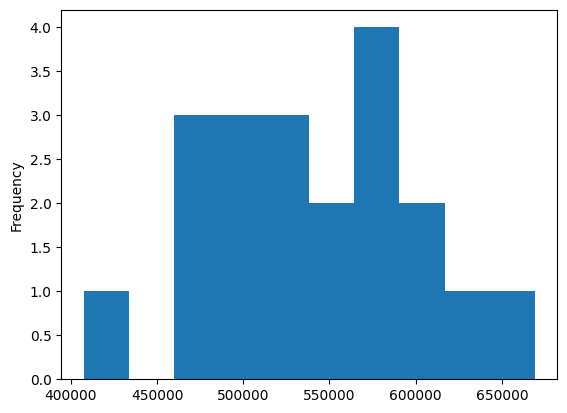

In [ ]:
df_sin_outliers[df_sin_outliers["TIENDA_ID"] == 10]["VENTA_TOTAL"].plot(kind="hist")

In [ ]:
prom_ventas = df_sin_outliers.groupby("TIENDA_ID")["VENTA_TOTAL"].mean().reset_index()
prom_ventas.head()

,TIENDA_ID,VENTA_TOTAL
0,1,7.718503e+05
1,2,9.203110e+05
2,3,8.274871e+05
3,4,1.281401e+06
4,5,1.637627e+06


In [ ]:
prom_ventas.shape

(1053, 2)

In [ ]:
prom_ventas.to_csv("Promedio_Ventas_por_mes_2.csv")

In [ ]:
ruta_competencia = "/content/drive/My Drive/oxxo_con_competencia.csv"
df_competencia = pd.read_csv(ruta_competencia)

In [ ]:
df_competencia


,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET,dist_comp_directa,num_comp_directa,dist_comp_indirecta,num_comp_indirecta
0,126,1,BC,Hogar,127.42,13,7,25.69107,-100.21261,Hogar Reunión,UT_DENSIDAD,TRAIN,71.235295,7,254.698363,1
1,681,1,C,Hogar,128.13,13,0,25.73571,-100.18086,Hogar Reunión,UT_DENSIDAD,TRAIN,707.882488,4,1441.429253,0
2,117,1,C,Base,87.62,11,11,25.71883,-100.19133,Hogar Reunión,UT_DENSIDAD,TRAIN,18.104075,8,251.026853,4
3,682,1,C,Hogar,90.70,13,0,25.66952,-100.20744,Hogar Reunión,UT_DENSIDAD,TRAIN,614.127087,4,NaN,0
4,275,1,C,Hogar,95.30,13,6,25.73766,-100.16116,Hogar Reunión,UT_DENSIDAD,TRAIN,618.241258,7,764.038094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,572,6,C,Hogar,0.00,13,0,25.57330,-100.02196,Hogar Reunión,UT_DENSIDAD,TRAIN,NaN,0,NaN,0
945,492,6,B,Base,0.00,13,0,25.27251,-100.00065,Hogar Reunión,UT_TRAFICO_VEHICULAR,TRAIN,14.647312,1,NaN,0
946,172,6,CD,Receso,122.70,8,0,25.19135,-99.81539,Parada Técnica,UT_CARRETERA_GAS,TRAIN,4.532981,1,NaN,0
947,748,6,C,Receso,0.00,0,0,25.27433,-100.01648,Parada Técnica,UT_CARRETERA_GAS,TRAIN,49.217323,4,599.489133,2


In [ ]:
ruta3 = "/content/drive/My Drive/ventas_con_target.csv"
df3 = pd.read_csv(ruta3)

In [ ]:
df_cdatos = df3.merge(df_competencia, on='TIENDA_ID', how='left')


In [ ]:
df_cdatos

,TIENDA_ID,VENTA_TOTAL,PLAZA_CVE_x,NIVELSOCIOECONOMICO_DES_x,ENTORNO_DES_x,MTS2VENTAS_NUM_x,PUERTASREFRIG_NUM_x,LATITUD_NUM_x,LONGITUD_NUM_x,SEGMENTO_MAESTRO_DESC_x,...,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM_y,LONGITUD_NUM_y,SEGMENTO_MAESTRO_DESC_y,LID_UBICACION_TIENDA_y,DATASET_y,dist_comp_directa,num_comp_directa,dist_comp_indirecta,num_comp_indirecta
0,1,7.718503e+05,2,C,Hogar,103.1825,12.0,26.00177,-98.24284,Hogar Reunión,...,0,26.00177,-98.24284,Hogar Reunión,UT_DENSIDAD,TRAIN,NaN,0,NaN,0
1,2,9.203110e+05,2,C,Hogar,87.8335,11.0,26.04198,-98.35620,Hogar Reunión,...,0,26.04198,-98.35620,Hogar Reunión,UT_DENSIDAD,TRAIN,0.375071,3,720.607503,1
2,3,8.274871e+05,2,C,Hogar,100.0633,12.0,26.02464,-98.26098,Hogar Reunión,...,0,26.02464,-98.26098,Hogar Reunión,UT_DENSIDAD,TRAIN,NaN,0,406.674598,1
3,4,1.281401e+06,2,A,Hogar,95.1627,11.0,26.04326,-98.23851,Hogar Reunión,...,0,26.04326,-98.23851,Hogar Reunión,UT_DENSIDAD,TRAIN,NaN,0,NaN,0
4,5,1.637627e+06,2,C,Hogar,94.1530,11.0,26.06397,-98.26165,Hogar Reunión,...,0,26.06397,-98.26165,Hogar Reunión,UT_DENSIDAD,TRAIN,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,1052,1.167620e+06,2,B,Base,84.2279,11.0,26.06517,-98.34480,Parada Técnica,...,0,26.06517,-98.34480,Parada Técnica,UT_DENSIDAD,TRAIN,653.331797,2,927.602602,1
936,1053,8.672598e+05,2,C,Hogar,90.8866,11.0,26.04132,-98.29259,Hogar Reunión,...,0,26.04132,-98.29259,Hogar Reunión,UT_DENSIDAD,TRAIN,857.371548,1,NaN,0
937,1054,1.611120e+06,2,C,Hogar,90.1169,11.0,26.09605,-98.29327,Hogar Reunión,...,0,26.09605,-98.29327,Hogar Reunión,UT_DENSIDAD,TRAIN,NaN,0,NaN,0
938,1055,1.041827e+06,2,C,Hogar,94.2265,11.0,26.01132,-98.38140,Hogar Reunión,...,0,26.01132,-98.38140,Hogar Reunión,UT_DENSIDAD,TRAIN,10.385799,1,NaN,0


In [ ]:
df_cdatos.to_csv('ventas_con_target_ycompetencia.csv', index=False, encoding='utf-8')